In [1]:
pip install ucimlrepo

In [2]:
#First two steps are to bring in the data from the referenced website
from ucimlrepo import fetch_ucirepo

national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset = fetch_ucirepo(id=887)

X = national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.data.features
y = national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.data.targets

print(national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.metadata)

print(national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.variables)

{'uci_id': 887, 'name': 'National Health and Nutrition Health Survey 2013-2014 (NHANES) Age Prediction Subset', 'repository_url': 'https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset', 'data_url': 'https://archive.ics.uci.edu/static/public/887/data.csv', 'abstract': "The National Health and Nutrition Examination Survey (NHANES), administered by the Centers for Disease Control and Prevention (CDC), collects extensive health and nutritional information from a diverse U.S. population. Though expansive, the dataset is often too broad for specific analytical purposes. In this sub-dataset, we narrow our focus to predicting respondents' age by extracting a subset of features from the larger NHANES dataset. These selected features include physiological measurements, lifestyle choices, and biochemical markers, which were hypothesized to have strong correlations with age.", 'area': 'Health and Medicine', 'tasks': ['Classifi

In [3]:
import pandas as pd
import numpy as np

In [31]:
#Create a dataframe with Features and Targets
national = national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset

In [6]:
df = pd.DataFrame(national.data.features)

In [7]:
df = df.assign(age_group=national.data.targets)

In [10]:
df = df.assign(RIDAGEYR=national.data.targets)

In [11]:
#Index the insulin levels to create a new column with assigned labels based off the value in the insulin column
df['Category'] = pd.cut(df['LBXIN'],
                        bins=[0, 10, 15, 30, 110],
                        labels=['Low', 'Medium', 'High', 'Very High'],
                        right=False,
                        include_lowest=True)

In [12]:
df.head()


,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group,RIDAGEYR,Category
0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult,Adult,Medium
1,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult,Adult,Low
2,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult,Adult,Low
3,1.0,2.0,28.9,104.0,2.0,84.0,16.15,Adult,Adult,High
4,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult,Adult,Medium


In [13]:
#Using Label encoding to change Adult and Senior into 1 and 2 for the KNN
d = {'Adult': 1, 'Senior': 2}
df['age_group'] = df['age_group'].map(d)
df['RIDAGEYR'] = df['RIDAGEYR'].map(d)
print(df)

      RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  LBXGLT  LBXIN  age_group  \
0          2.0     2.0    35.7   110.0     2.0   150.0  14.91          1   
1          2.0     2.0    20.3    89.0     2.0    80.0   3.85          1   
2          1.0     2.0    23.2    89.0     2.0    68.0   6.14          1   
3          1.0     2.0    28.9   104.0     2.0    84.0  16.15          1   
4          2.0     1.0    35.9   103.0     2.0    81.0  10.92          1   
...        ...     ...     ...     ...     ...     ...    ...        ...   
2273       2.0     2.0    33.5   100.0     2.0    73.0   6.53          1   
2274       1.0     2.0    30.0    93.0     2.0   208.0  13.02          1   
2275       1.0     2.0    23.7   103.0     2.0   124.0  21.41          1   
2276       2.0     2.0    27.4    90.0     2.0   108.0   4.99          1   
2277       1.0     2.0    24.5   108.0     2.0   108.0   3.76          1   

      RIDAGEYR Category  
0            1   Medium  
1            1      Low  
2        

In [14]:
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [15]:
#To give more familar names to the column headers
df.rename(columns={'RIAGENDR': 'Gender', 'PAQ605': 'Exercise', 'BMXBMI': 'BMI', 'LBXGLU': 'Glucose', 'DIQ010': 'Diabetic', 'LBXGLT': 'Oral_Glucose', 'RIDAGEYR': 'Age', 'LBXIN': 'Insulin', 'Category': 'Insulin_Category'}, inplace=True)

In [16]:
print(df)

      Gender  Exercise   BMI  Glucose  Diabetic  Oral_Glucose  Insulin  \
0        2.0       2.0  35.7    110.0       2.0         150.0    14.91   
1        2.0       2.0  20.3     89.0       2.0          80.0     3.85   
2        1.0       2.0  23.2     89.0       2.0          68.0     6.14   
3        1.0       2.0  28.9    104.0       2.0          84.0    16.15   
4        2.0       1.0  35.9    103.0       2.0          81.0    10.92   
...      ...       ...   ...      ...       ...           ...      ...   
2273     2.0       2.0  33.5    100.0       2.0          73.0     6.53   
2274     1.0       2.0  30.0     93.0       2.0         208.0    13.02   
2275     1.0       2.0  23.7    103.0       2.0         124.0    21.41   
2276     2.0       2.0  27.4     90.0       2.0         108.0     4.99   
2277     1.0       2.0  24.5    108.0       2.0         108.0     3.76   

      age_group  Age Insulin_Category  
0             1    1           Medium  
1             1    1           

In [17]:
#Using Z-Score to detect outlier and then remove them from columns Glucose, BMI and Oral Glucose
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['Glucose']))
print(z)

0       0.584085
1       0.590024
2       0.590024
3       0.248625
4       0.192715
          ...   
2273    0.024985
2274    0.366384
2275    0.192715
2276    0.534114
2277    0.472265
Name: Glucose, Length: 2278, dtype: float64


In [18]:
threshold_z = 2

outlier_indices = np.where(z > threshold_z)[0]
no_outliers = df.drop(outlier_indices)
print("Original DataFrame Shape:", df.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)

Original DataFrame Shape: (2278, 10)
DataFrame Shape after Removing Outliers: (2237, 10)


In [19]:
z = np.abs(stats.zscore(no_outliers['BMI']))
print(z)

0       1.092822
1       1.050235
2       0.646672
3       0.146537
4       1.120654
          ...   
2273    0.786671
2274    0.299613
2275    0.577092
2276    0.062202
2277    0.465765
Name: BMI, Length: 2237, dtype: float64


In [20]:
threshold_z = 2

outlier_indices = no_outliers[z > threshold_z].index
no_outliers2 = no_outliers.drop(outlier_indices)
print("Original DataFrame Shape:", no_outliers.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers2.shape)

Original DataFrame Shape: (2237, 10)
DataFrame Shape after Removing Outliers: (2132, 10)


In [21]:
z = np.abs(stats.zscore(no_outliers2['Oral_Glucose']))
print(z)

0       1.016329
1       0.825439
2       1.141170
3       0.720195
4       0.799128
          ...   
2273    1.009616
2274    2.542365
2275    0.332244
2276    0.088732
2277    0.088732
Name: Oral_Glucose, Length: 2132, dtype: float64


In [22]:
threshold_z = 2

outlier_indices = no_outliers2[z > threshold_z].index
df = no_outliers2.drop(outlier_indices)
print("Original DataFrame Shape:", no_outliers2.shape)
print("DataFrame Shape after Removing Outliers:", df.shape)

Original DataFrame Shape: (2132, 10)
DataFrame Shape after Removing Outliers: (2032, 10)


In [23]:
print(df)

      Gender  Exercise   BMI  Glucose  Diabetic  Oral_Glucose  Insulin  \
0        2.0       2.0  35.7    110.0       2.0         150.0    14.91   
1        2.0       2.0  20.3     89.0       2.0          80.0     3.85   
2        1.0       2.0  23.2     89.0       2.0          68.0     6.14   
3        1.0       2.0  28.9    104.0       2.0          84.0    16.15   
4        2.0       1.0  35.9    103.0       2.0          81.0    10.92   
...      ...       ...   ...      ...       ...           ...      ...   
2272     1.0       2.0  22.5     98.0       2.0          79.0     3.51   
2273     2.0       2.0  33.5    100.0       2.0          73.0     6.53   
2275     1.0       2.0  23.7    103.0       2.0         124.0    21.41   
2276     2.0       2.0  27.4     90.0       2.0         108.0     4.99   
2277     1.0       2.0  24.5    108.0       2.0         108.0     3.76   

      age_group  Age Insulin_Category  
0             1    1           Medium  
1             1    1           

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

In [25]:
#Assign the features to the X axis without the target; assign the target to the Y
X = df.drop('Age', axis=1)
X = df.drop('Insulin_Category', axis=1)
Y = df['Insulin_Category']

In [26]:
#Train the test and train split
X_train, X_test, y_train, y_test = train_test_split(
             X, Y, test_size = 0.2, random_state=42)

In [28]:
#KNN accuracy score
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.8157248157248157


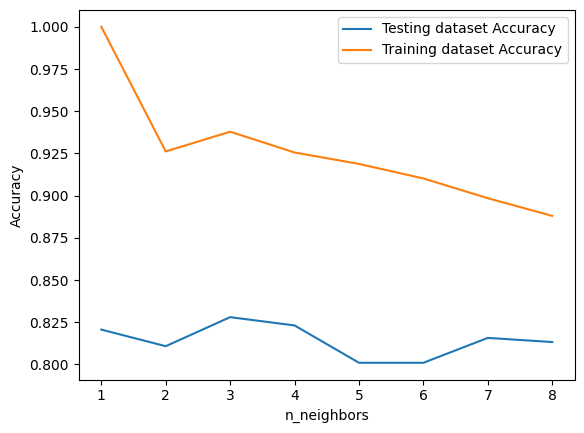

In [30]:
#run the KNN and plot for the 8 features
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()